In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from tqdm import tqdm
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

100%|██████████| 16/16 [00:01<00:00,  8.30it/s]


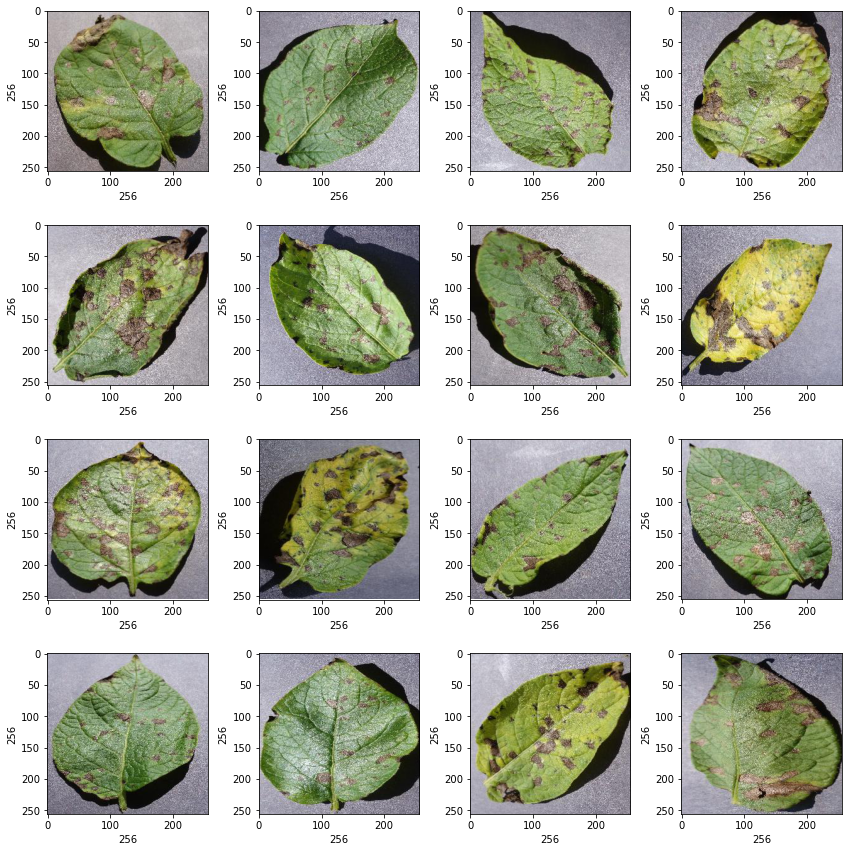

In [20]:
# Plotting 12 images
plt.figure(figsize=(12,12))
path = "Plant_images/Potato___Early_blight"
for i in tqdm(range(1,17)):
    plt.subplot(4,4,i)
    plt.tight_layout()
    listimg = os.listdir(path)
    rand_img = imread(path + '/' + random.choice(sorted(listimg)))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image


In [34]:
# Converting images to array
def convert_image_to_array(image_dir):
    try:
        img = cv2.imread(image_dir)
        if img is not None:
            img = cv2.resize(img,(256,256))
            return image.img_to_array(img)
        else : 
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [35]:
dir = "Plant_images"
root_dir = os.listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight','Tomato-bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
    plant_image_list = os.listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [23]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [36]:
image_list[0].shape

(256, 256, 3)

In [37]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size= 0.2, random_state= 10)

In [46]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [47]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3,3), padding = "same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters= 64, kernel_size= (3,3), padding= "same", activation= "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation= "softmax"))
model.summary()

2021-12-05 00:40:22.746587: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7225408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [43]:
model.compile(loss = "categorical_crossentropy", optimizer= Adam(0.0001), metrics=['accuracy'])

In [48]:
# Split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [49]:
epochs = 50
batch_size = 128
history = model.fit(X_train,Y_train, batch_size= batch_size, epochs= epochs, validation_data=(X_val, Y_val))

2021-12-05 01:13:03.712626: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
5/5 [==============================] - 28s 5s/step - loss: 0.9930 - accuracy: 0.5017 - val_loss: 0.6946 - val_accuracy: 0.6806
Epoch 2/50
5/5 [==============================] - 20s 4s/step - loss: 0.6198 - accuracy: 0.6493 - val_loss: 0.5066 - val_accuracy: 0.6389
Epoch 3/50
5/5 [==============================] - 20s 4s/step - loss: 0.4350 - accuracy: 0.8889 - val_loss: 0.3658 - val_accuracy: 0.9583
Epoch 4/50
5/5 [==============================] - 20s 4s/step - loss: 0.3443 - accuracy: 0.9080 - val_loss: 0.2792 - val_accuracy: 0.9514
Epoch 5/50
5/5 [==============================] - 20s 4s/step - loss: 0.2528 - accuracy: 0.9653 - val_loss: 0.2075 - val_accuracy: 0.9722
Epoch 6/50
5/5 [==============================] - 20s 4s/step - loss: 0.1988 - accuracy: 0.9410 - val_loss: 0.1661 - val_accuracy: 0.9722
Epoch 7/50
5/5 [==============================] - 19s 4s/step - loss: 0.1477 - accuracy: 0.9792 - val_loss: 0.1268 - val_accuracy: 0.9722
Epoch 8/50
5/5 [==================

In [50]:
model.save('model.h5')
json_model = model.to_json()


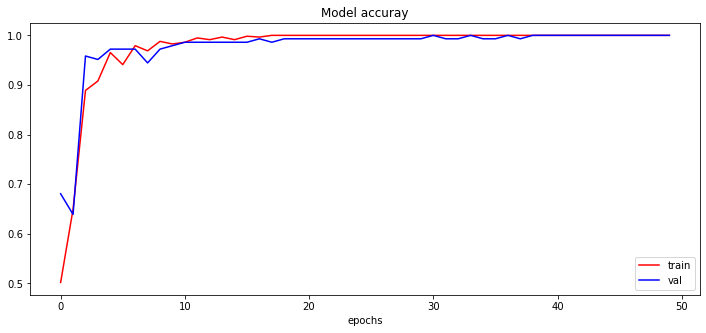

In [51]:
#plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model accuray')
plt.xlabel('epochs')
plt.legend(['train',  'val'])

plt.show()

In [52]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 3s 387ms/step - loss: 0.0532 - accuracy: 0.9778
Test Accuracy: 97.77777791023254


In [53]:
y_pred = model.predict(x_test)

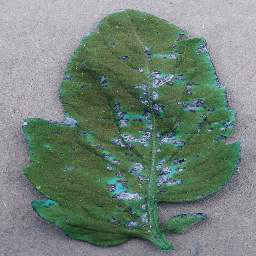

In [54]:
img = image.array_to_img(x_test[10])
img

In [56]:
print("Originally : ", all_labels[np.argmax(y_test[10])])
print("Predicted : ", all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
